
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer

1) **Fake Reviews Detection** : Amazon's task of detecting fake reviews is first and foremost a classification problem. The company's main goal in developing such a system would be to classify each review as "fake" or not, and filter out the former. A possible data set might be comprised of some combination of the following potential predictors:
    
    * user account information (i.e. recency of account opening, time of posting, purchase history, IP address)
    * content of review (i.e. number of stars, number of words in subject/review, keywords, references to product creator)
    * user review history (i.e. previous suggested reviews, review history)

Their task of building the original detection system would be valuable in helping Amazon retain integrity with its customers while helping protect suppliers from targeted fake review schemes.

2) **Customer Segmentation** : Separating Amazon customers into segments -- or clusters -- is integral to the efficient use of advertising dollars. It's likely the backbone of a highly functioning reccomendation system for both products and reviews to drive supplement purchases, repeat orders, scheduled deliveries and more. Clustering would likely make use of some of the user listed data below, and plenty more:

    * account information (i.e. recency of account opening, purchase history)
    * demographic information (i.e. state and location from shipping address, age, location)
    * movement habits (i.e. are purchases made at home? from work? any variables created by looking at changes within ISP address would potentially be useful)
    * usage habits (i.e. time spent on site, visits/purchases per month/year, Prime membership and renewals, time spend shopping, reading reviews, watching movies)
    * search history (i.e. most frequent categories, items, frequency of searches converted to sales)
    * joint account information, when relevant (i.e. how many users access the account, number of credit cards/shipping addresses... this could prove tricky for clustering a single account that clearly has a number of users with different habits, though purchases can be connected to different account users based on shipping addresses)

# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

ln[p(t|theta)] = sum from i to n of: -ln[C]-5ln[theta]+4ln[t]-t/theta 

derivative wrt t =0 
-5/theta +(sum from i to n of:t(i))/theta^2 = 0 

theta = (sum from i to n of:t(i))/5

In [14]:
intervals = [1,3,1.5,4,2,7,1.2,2,4,3.1]
MLE = sum(intervals)/5

### **The maximum likelihood estimate for time to generate the next 5 leads is 5.76 hours.**

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



## Answer



In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

import seaborn
%config InlineBackend.figure_format = 'retina'
%pylab inline
boston = datasets.load_boston()

X = boston.data
y = boston.target

Populating the interactive namespace from numpy and matplotlib


The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).


a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.


In [3]:
#3a
row , col = X.shape
print "Number of rows is:" , row
print "Number of columns is:" , col
X[:5,]

Number of rows is: 506
Number of columns is: 13


array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [4]:
#3b
lr = linear_model.LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
full_mse =mean_squared_error(y, y_pred)
feature_names = list(boston.feature_names)
print 'Coefficients:', (list(zip(feature_names, lr.coef_)))
print ""
print "Mean squared error:" , full_mse

Coefficients: [('CRIM', -0.10717055656035566), ('ZN', 0.046395219529801954), ('INDUS', 0.02086023953217235), ('CHAS', 2.6885613993179542), ('NOX', -17.795758660308959), ('RM', 3.8047524602580078), ('AGE', 0.00075106170331906696), ('DIS', -1.4757587965198167), ('RAD', 0.30565503833909946), ('TAX', -0.012329346305275379), ('PTRATIO', -0.95346355469055832), ('B', 0.009392512722190105), ('LSTAT', -0.52546663290078932)]

Mean squared error: 21.8977792177


c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

In [5]:
#3c
test_set_size = 400
X_mlr_train = X[:test_set_size,]
X_mlr_test = X[test_set_size:,]
y_mlr_train = y[:test_set_size]
y_mlr_test = y[test_set_size:]

regr_split = linear_model.LinearRegression()
regr_split.fit(X_mlr_train, y_mlr_train)
y_mlr_pred = regr_split.predict(X_mlr_test)
mse_mlr_train =mean_squared_error(y_mlr_test, y_mlr_pred)
print 'Coefficients:', (list(zip(feature_names, regr_split.coef_)))
print ""
print "Mean squared error:" , mse_mlr_train
print ""
print "Full mean squared error:", full_mse


Coefficients: [('CRIM', -0.19124637406377828), ('ZN', 0.044228996740611648), ('INDUS', 0.055220797708299692), ('CHAS', 1.7163135101784344), ('NOX', -14.995721984709885), ('RM', 4.8877302498898034), ('AGE', 0.0026092103089931928), ('DIS', -1.2948079881029388), ('RAD', 0.48478721404553315), ('TAX', -0.015400667282678526), ('PTRATIO', -0.80879502606278253), ('B', -0.00129230426720639), ('LSTAT', -0.51795379132161212)]

Mean squared error: 38.1643386432

Full mean squared error: 21.8977792177


### **It appears the MSE of 0.169 from using the full dataset is lower than the MSE of 0.39 found using the training and test set. This makes sense because training a model on more data decreases variance.**

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

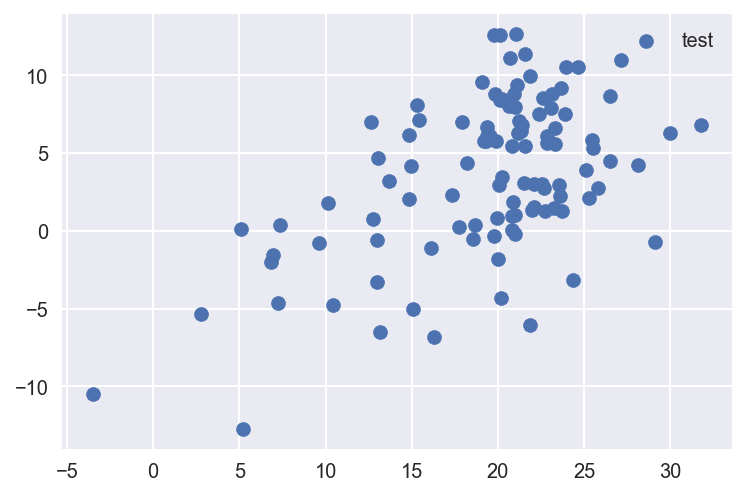

In [6]:
#3d

plt.scatter(y_mlr_pred,y_mlr_pred-y_mlr_test, label="test")
plt.legend()

### **Based on the residual plot, it is hard to believe the MLR model is ideal for this data. The residual plot of appears not to be random but almost linear, which means our model is fundementally missing a key part of the relationship between our predictors and outcome variable.**

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [7]:
X = np.concatenate((X, np.square(X)), axis=1)

In [8]:
X_new_mlr_train = X[:test_set_size,]
X_new_mlr_test = X[test_set_size:,]
y_mlr_train = y[:test_set_size]
y_mlr_test = y[test_set_size:]
regr_split = linear_model.LinearRegression()
regr_split.fit(X_new_mlr_train, y_mlr_train)
y_mlr_pred = regr_split.predict(X_new_mlr_test)
print 'Coefficients:', (list(zip(feature_names, regr_split.coef_)))
print ""
print "Mean squared error:" , mean_squared_error(y_mlr_test, y_mlr_pred)


Coefficients: [('CRIM', -0.62856402910795672), ('ZN', -0.046928341263593562), ('INDUS', 0.13599800820684246), ('CHAS', 1.1267051759147673), ('NOX', -38.908594044056471), ('RM', -17.147036748952612), ('AGE', -0.019271401728605794), ('DIS', -2.4921107297189518), ('RAD', 0.68546887202694151), ('TAX', -0.11090055266154275), ('PTRATIO', -6.251523811944395), ('B', 0.042535826326586507), ('LSTAT', -1.4391546026352842)]

Mean squared error: 32.9465487206


# Question 4: Ridge and Lasso Regression (25 points)


## Answer



Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import preprocessing
X = preprocessing.scale(X)
y = preprocessing.scale(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

feature_names = list(boston.feature_names)
full_feature_names = list(feature_names)
for i in feature_names:
    full_feature_names.append(str(i) + ".Sqd")

### **Since our goal is to minimize certain unimportant predictors to zero for Lasso, standardization will help put all explanatory variables on similar scaling and thus will not skew the results based on the magnitudes of the coefficients.**

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

In [10]:
lasso = Lasso(random_state=None)
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
clf = GridSearchCV(lasso, tuned_parameters, cv=KFold(n_splits=5), refit=True, scoring="neg_mean_squared_error")
clf.fit(X_train, y_train)
lasso_bestalpha = clf.best_params_["alpha"]
lasso_bestMSE = clf.best_score_
print "For Lasso, the best alpha is:", lasso_bestalpha, "..."
print "And it's corresponding MSE is:", abs(lasso_bestMSE)
print ""


ridge = Ridge(random_state=None)
crf = GridSearchCV(ridge, tuned_parameters, cv=KFold(n_splits=5), refit=True, scoring="neg_mean_squared_error")
crf.fit(X_train, y_train)
ridge_bestalpha = crf.best_params_["alpha"]
ridge_bestMSE = crf.best_score_
print "For Ridge, the best alpha is:", ridge_bestalpha, "..."
print "And it's corresponding MSE is:", abs(ridge_bestMSE)


# least = min(alpha_mse, key = lambda t: t[1])
# print "The LASSO alpha with the smallest MSE value of", least[1], "is", least[0]


For Lasso, the best alpha is: 0.005 ...
And it's corresponding MSE is: 0.202183029907

For Ridge, the best alpha is: 0.328966612329 ...
And it's corresponding MSE is: 0.188762886269


2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

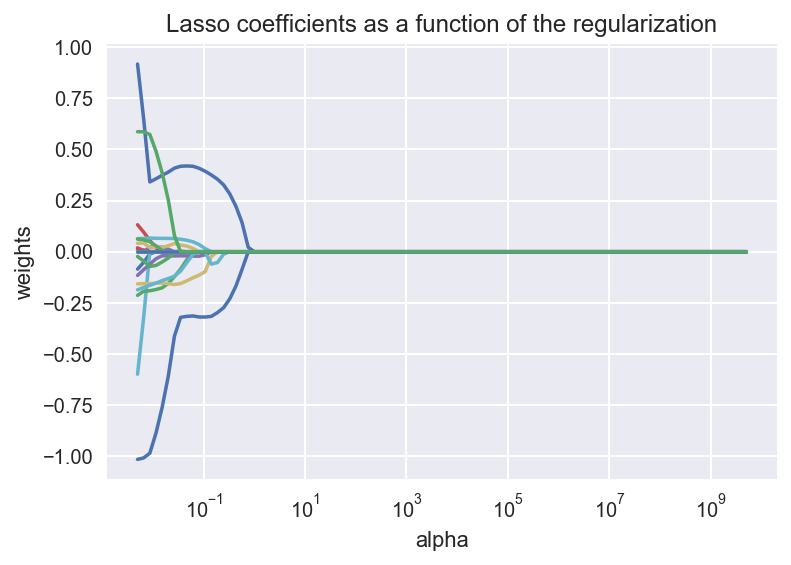

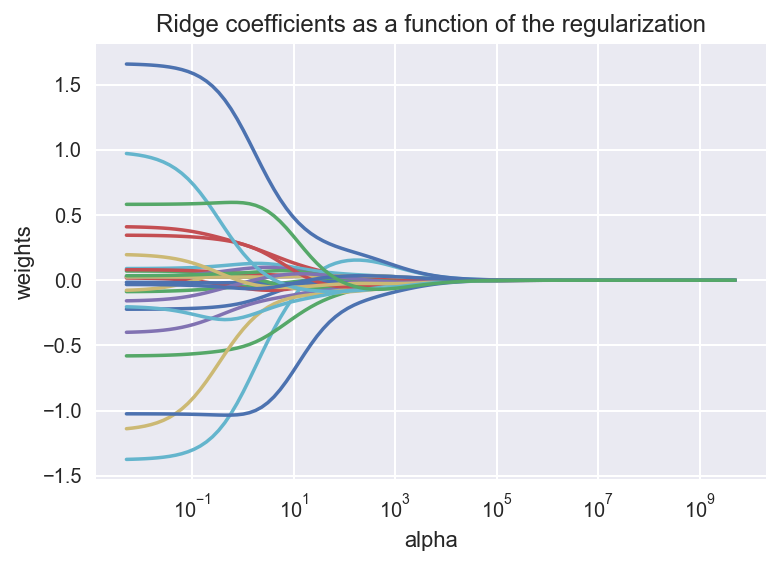

In [11]:
#2
Lasso_coeff = []
Ridge_coeff = []

for alpha in alphas:
    clf = Lasso(alpha=alpha)
    fit = clf.fit(X_train, y_train)
    Lasso_coeff.append(fit.coef_)

for alpha in alphas:
    crf = Ridge(alpha=alpha)
    ridge_fit = crf.fit(X_train, y_train)
    Ridge_coeff.append(ridge_fit.coef_)
    
ax = plt.gca()

ax.plot(alphas, Lasso_coeff)
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

ax = plt.gca()

ax.plot(alphas, Ridge_coeff)
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# lasso_df = pd.DataFrame(Lasso_coeff) # turns list of coefficients into data frame
# lasso_df.rename(columns = {lasso_df.columns[0]:'Alphas'}, inplace = True)
# lasso_tags = lasso_df[1].apply(pd.Series) # expands list of coefficients
# lasso_df = pd.concat([lasso_df['Alphas'], lasso_tags[:]], axis=1)
# lasso_df

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)


In [12]:
#3
#Least Squares Regression
lsr_regr_split = linear_model.LinearRegression()
lsr_regr_split.fit(X_train, y_train)
y_lsr_pred = lsr_regr_split.predict(X_test)
mse_lsr =mean_squared_error(y_test, y_lsr_pred)
print 'The MSE for least squares regression is: ', mse_lsr

#Ridge Regression
clf_ridge = Ridge(alpha=ridge_bestalpha)
fit_ridge = clf_ridge.fit(X_train, y_train)
y_pred_ridge = fit_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print 'The MSE for ridge regression is: ', mse_ridge

#Lasso Regression
clf_lasso = Lasso(alpha=lasso_bestalpha)
fit_lasso = clf_lasso.fit(X_train, y_train)
y_pred_lasso = fit_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print 'The MSE for lasso regression is: ', mse_lasso

The MSE for least squares regression is:  0.204904824398
The MSE for ridge regression is:  0.208912185221
The MSE for lasso regression is:  0.241038732894


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

In [13]:
#4
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, y_train)
print "Based on 10-fold CV of the full data, the amount of penalization chosen is:", lassocv.alpha_
print ""

lassocv_final = Lasso(alpha=lassocv.alpha_)
lassocv_final.fit(X_train, y_train)
print "Final MSE of test data based on lasso run on training data is:", mean_squared_error(y_test, lassocv_final.predict(X_test))
print ""
print "The coefficients:", (list(zip(full_feature_names, lassocv_final.coef_)))
print ''
print "We notice that there are", len([t[1] for t in (list(zip(full_feature_names, lassocv_final.coef_))) if t[1] == 0]), "coefficients that are shrunk to zero out of 26 terms."


Based on 10-fold CV of the full data, the amount of penalization chosen is: 0.00180879958024

Final MSE of test data based on lasso run on training data is: 0.221099249207

The coefficients: [('CRIM', -0.13960519492282855), ('ZN', -0.0), ('INDUS', 0.0), ('CHAS', 0.0081743599287118409), ('NOX', -0.0), ('RM', -1.1246350948139623), ('AGE', 0.0), ('DIS', -0.43524537406430741), ('RAD', 0.20532242683917731), ('TAX', -0.18085507773314144), ('PTRATIO', -0.16164706041640264), ('B', 0.061335018423125373), ('LSTAT', -1.0102706327702462), ('CRIM.Sqd', -0.0), ('ZN.Sqd', 0.015875723158401554), ('INDUS.Sqd', 0.034889771193776405), ('CHAS.Sqd', 0.033698669227266366), ('NOX.Sqd', -0.22720516506848332), ('RM.Sqd', 1.4262578395848353), ('AGE.Sqd', 0.049231972109697326), ('DIS.Sqd', 0.21154390350124444), ('RAD.Sqd', 0.0), ('TAX.Sqd', -0.0), ('PTRATIO.Sqd', 0.0), ('B.Sqd', -0.0), ('LSTAT.Sqd', 0.57105989186311135)]

We notice that there are 9 coefficients that are shrunk to zero out of 26 terms.


# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

One case is a less general model in which the predictors are independent. We would not expect interactions of these independent variables to have much meaning or statistical weight on the dependent variable, and thus their inclusion would add only noise, error, and interpretability problems to a less general model.

We would expect a similar situation for a regression model that was prone to outliers. Any interaction between two independent variables in which one (or both) have significant outliers would threaten to place even more undue weight on the extreme values. 
